In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [30]:
import pandas as pd
import os

# Load dataset
try:
    df = pd.read_csv("cardio_train (1).csv", sep=";")
    print("✅ Dataset loaded successfully!")

    print(df.head())  # Show first 5 rows
except FileNotFoundError:
    print("❌ Error: 'cardio_train (1).csv' not found.")
    print("Expected path:", r"C:\Users\YourName\project\MultipleFiles\cardio_train (1).csv")
    print("Current working directory:", os.getcwd())
    raise SystemExit

✅ Dataset loaded successfully!
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [31]:
# --- 1. Data Pre-processing Operations ---
print("--- 1. Data Pre-processing Operations ---")
# Display initial information
print("\nInitial DataFrame Info:")
df.info()
print("\nFirst 5 rows of the dataset:")
print(df.head())
# Check for missing values
print("\nMissing values before handling:")
print(df.isnull().sum())
# Drop the 'id' column as it's not useful for prediction
df = df.drop('id', axis=1)
print("\n'id' column dropped.")
# Handle outliers or incorrect values (e.g., ap_hi, ap_lo)
# Assuming normal blood pressure ranges: systolic (ap_hi) 80-200, diastolic (ap_lo) 60-120
# Some values like 1100, 1000, 900, 600, 40, 14, 7, 12 are clearly incorrect.
# Let's filter out extreme outliers based on common medical knowledge.
df = df[(df['ap_hi'] > 70) & (df['ap_hi'] < 200)]
df = df[(df['ap_lo'] > 50) & (df['ap_lo'] < 120)]
print("\nFiltered out extreme outliers in 'ap_hi' and 'ap_lo'.")


--- 1. Data Pre-processing Operations ---

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

First 5 rows of the dataset:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    6


--- 2. Data Analysis and Visualizations ---


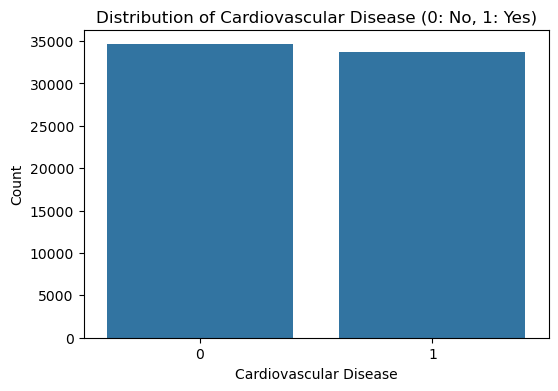

In [32]:
# --- 2. Data Analysis and Visualizations ---
print("\n--- 2. Data Analysis and Visualizations ---")

# Distribution of 'cardio' (target variable)
plt.figure(figsize=(6, 4),)
sns.countplot(x='cardio', data=df,)
plt.title('Distribution of Cardiovascular Disease (0: No, 1: Yes)')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.show()

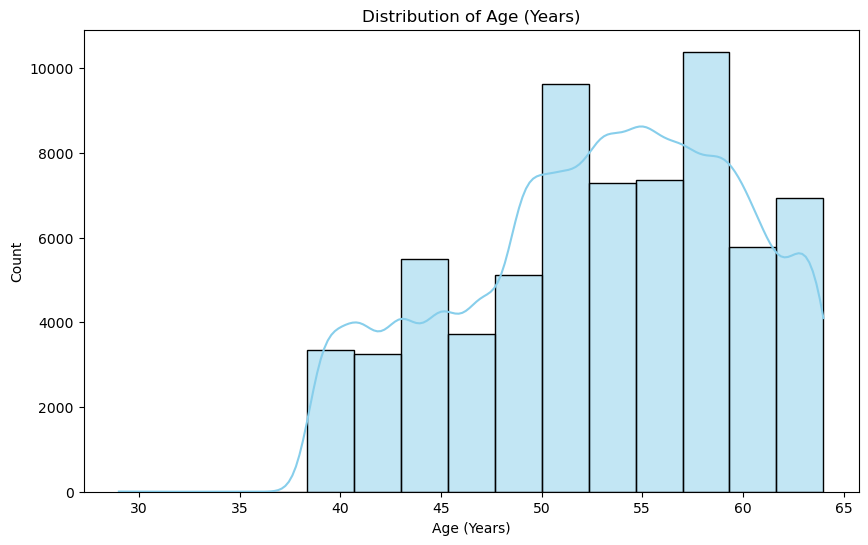

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert age from days → years
df['age_years'] = (df['age'] / 365).astype(int)

# Plot distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Age (Years)')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()


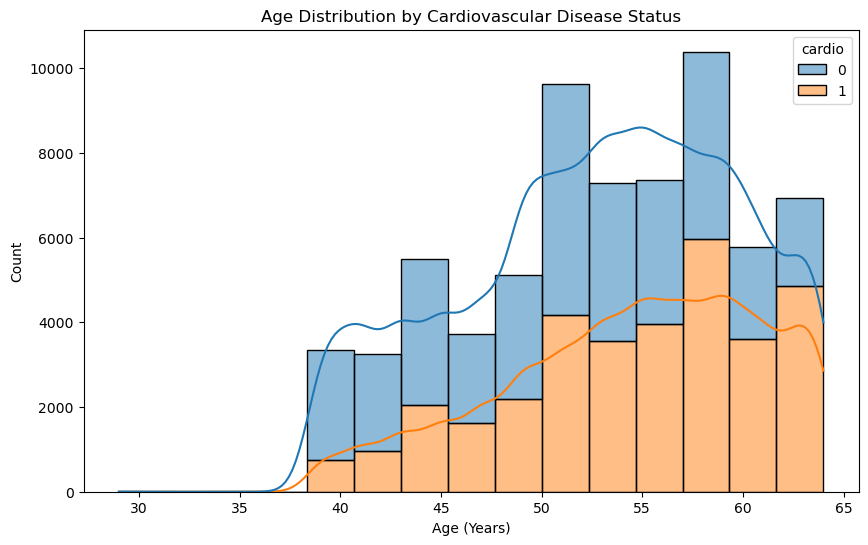

In [34]:
# Age vs. Cardiovascular Disease
plt.figure(figsize=(10, 6))
sns.histplot(x='age_years', hue='cardio', data=df, bins=15, kde=True, multiple='stack')
plt.title('Age Distribution by Cardiovascular Disease Status')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

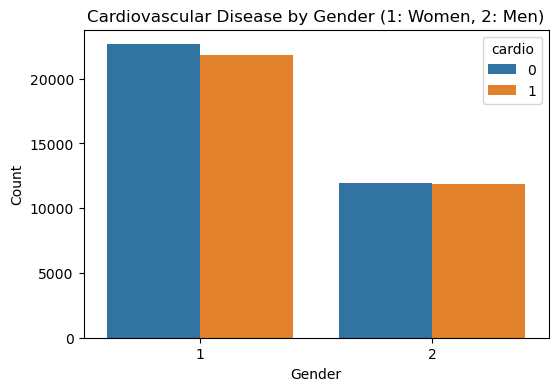

In [35]:
# Gender vs. Cardiovascular Disease
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Gender (1: Women, 2: Men)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

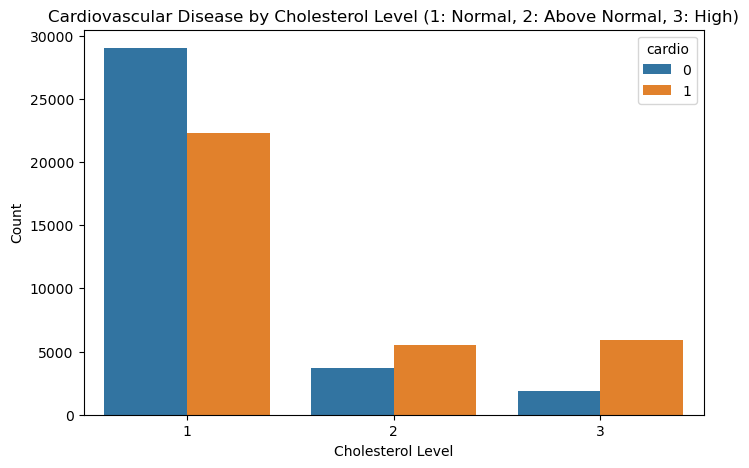

In [36]:
# Cholesterol vs. Cardiovascular Disease
plt.figure(figsize=(8, 5))
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Cholesterol Level (1: Normal, 2: Above Normal, 3: High)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

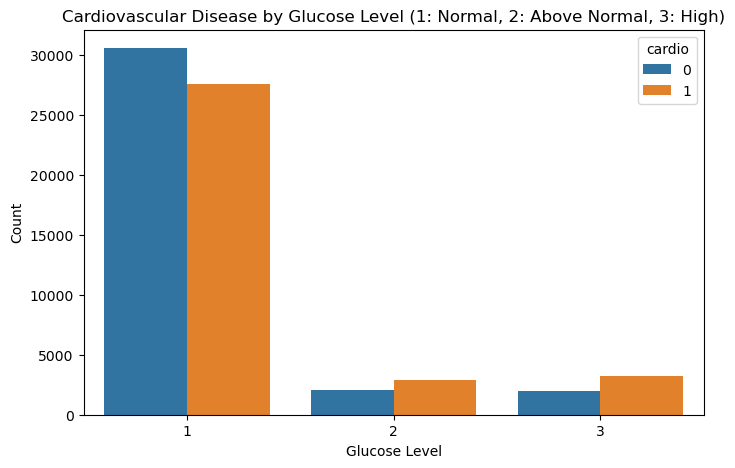

In [37]:
# Glucose vs. Cardiovascular Disease
plt.figure(figsize=(8, 5))
sns.countplot(x='gluc', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Glucose Level (1: Normal, 2: Above Normal, 3: High)')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()

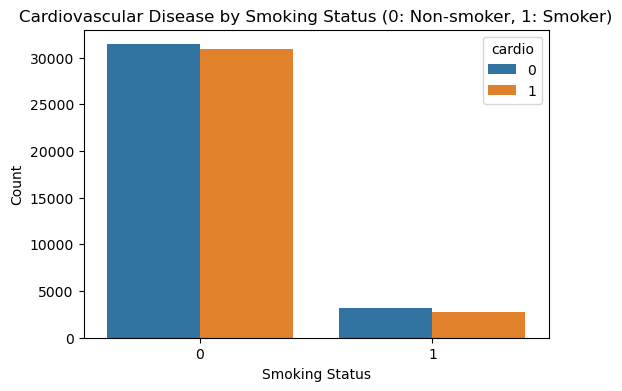

In [38]:
# Smoking vs. Cardiovascular Disease
plt.figure(figsize=(6, 4))
sns.countplot(x='smoke', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Smoking Status (0: Non-smoker, 1: Smoker)')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

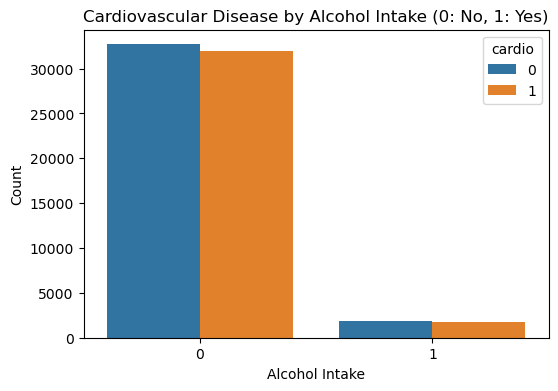

In [39]:
# Alcohol vs. Cardiovascular Disease
plt.figure(figsize=(6, 4))
sns.countplot(x='alco', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Alcohol Intake (0: No, 1: Yes)')
plt.xlabel('Alcohol Intake')
plt.ylabel('Count')
plt.show()

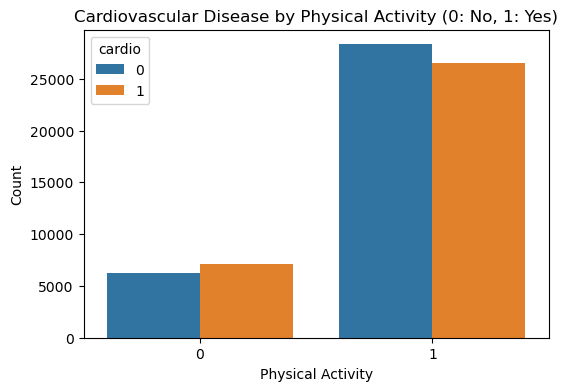

In [40]:
# Physical Activity vs. Cardiovascular Disease
plt.figure(figsize=(6, 4))
sns.countplot(x='active', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Physical Activity (0: No, 1: Yes)')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

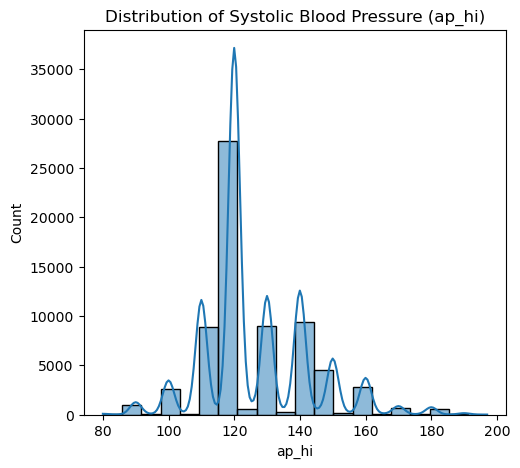

In [41]:
# Blood Pressure (ap_hi, ap_lo) distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['ap_hi'], bins=20, kde=True)
plt.title('Distribution of Systolic Blood Pressure (ap_hi)')
plt.xlabel('ap_hi')
plt.ylabel('Count')

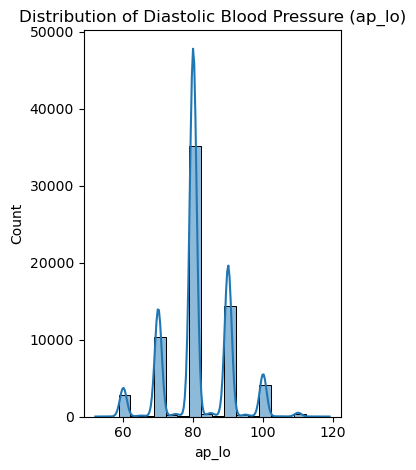

In [42]:
plt.subplot(1, 2, 2)
sns.histplot(df['ap_lo'], bins=20, kde=True)
plt.title('Distribution of Diastolic Blood Pressure (ap_lo)')
plt.xlabel('ap_lo')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

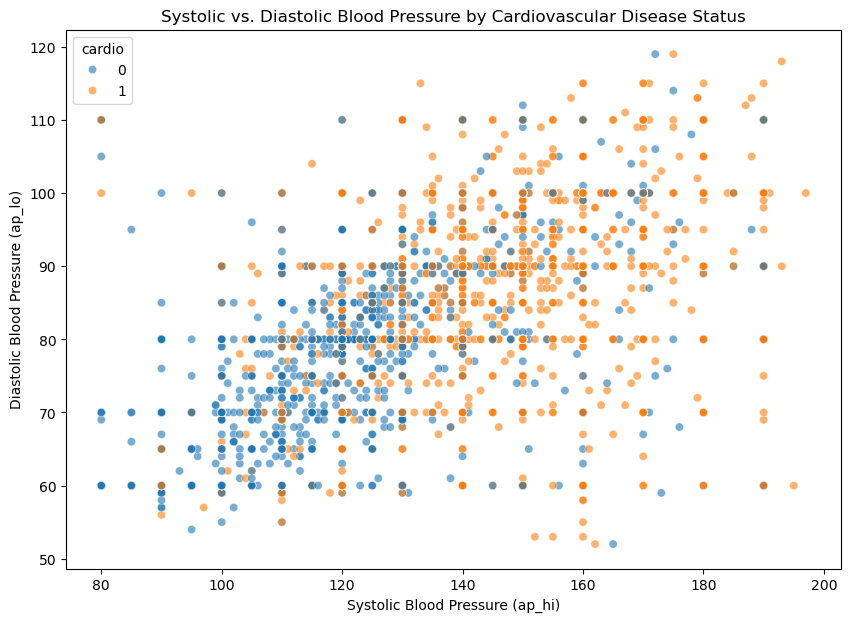

In [43]:
# Scatter plot of Blood Pressure
plt.figure(figsize=(10, 7))
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=df, alpha=0.6)
plt.title('Systolic vs. Diastolic Blood Pressure by Cardiovascular Disease Status')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.show()


BMI calculated and added as 'bmi' column.


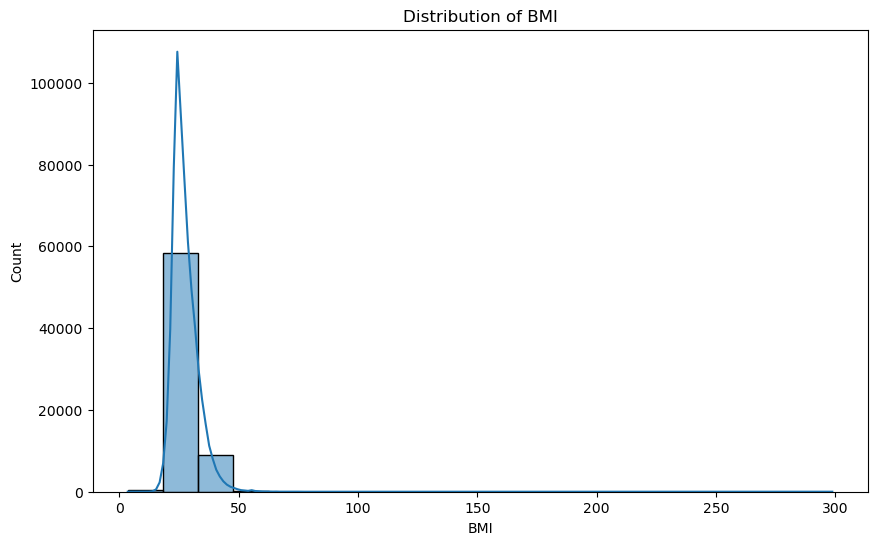

In [44]:
# BMI calculation and distribution
df['bmi'] = df['weight'] / ((df['height'] / 100)**2)
print("\nBMI calculated and added as 'bmi' column.")

plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

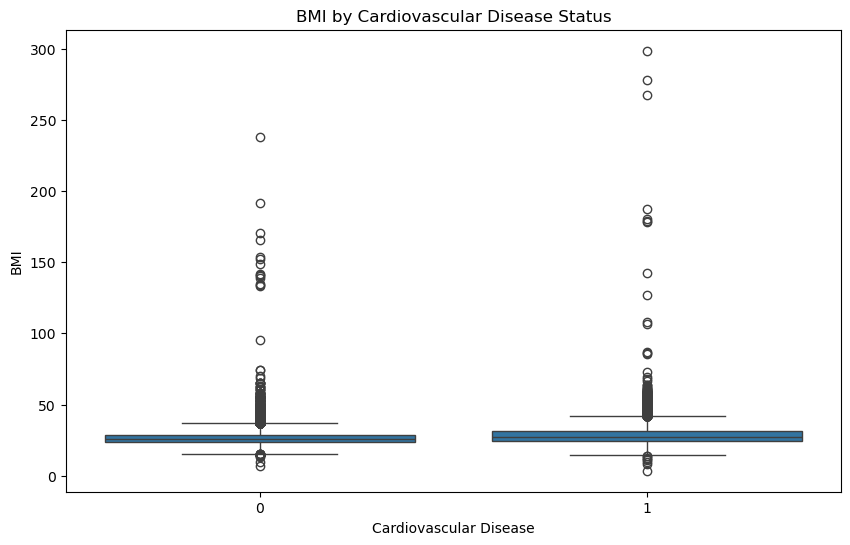

In [45]:
# BMI vs. Cardiovascular Disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='bmi', data=df)
plt.title('BMI by Cardiovascular Disease Status')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('BMI')
plt.show()

In [46]:
# --- 3. Correlation Matrix of Features ---
print("\n--- 3. Correlation Matrix of Features ---")
# Drop original 'age' column as 'age_years' is used
df_corr = df.drop('age', axis=1)
# Calculate correlation matrix
correlation_matrix = df_corr.corr()


--- 3. Correlation Matrix of Features ---


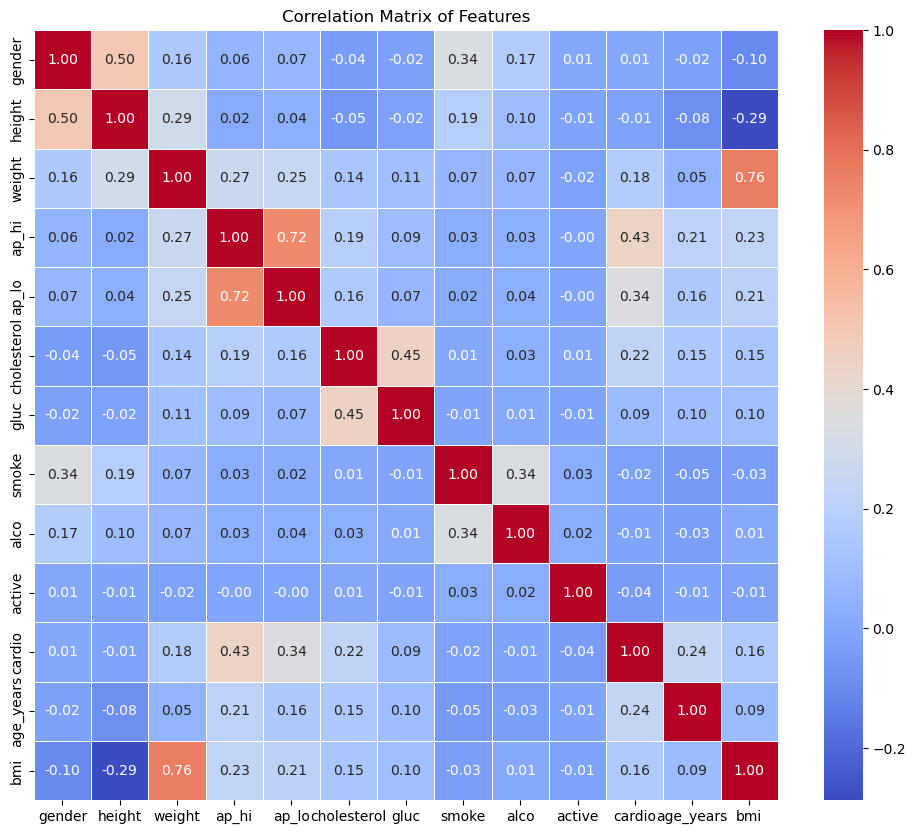

In [47]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [48]:
# --- 4. Machine Learning Techniques and Accuracy Levels ---
print("\n--- 4. Machine Learning Techniques and Accuracy Levels ---")

# Define features (X) and target (y)
X = df_corr.drop('cardio', axis=1)
y = df_corr['cardio']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nNumerical features standardized.")


--- 4. Machine Learning Techniques and Accuracy Levels ---

Training set shape: (54636, 12), Testing set shape: (13660, 12)

Numerical features standardized.


In [49]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

accuracy_results = {}



--- Training Logistic Regression ---


Accuracy: 0.7302
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6921
           1       0.76      0.67      0.71      6739

    accuracy                           0.73     13660
   macro avg       0.73      0.73      0.73     13660
weighted avg       0.73      0.73      0.73     13660

Confusion Matrix:


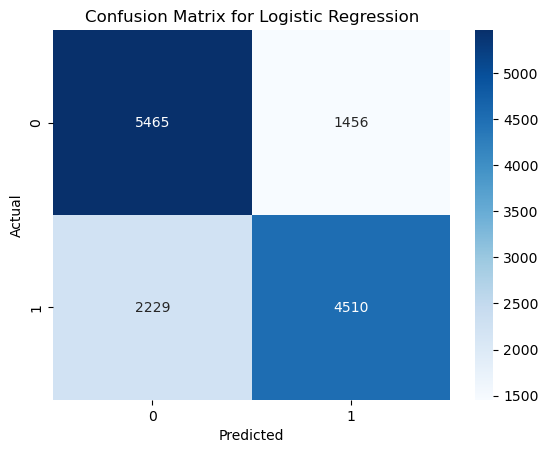


--- Training K-Nearest Neighbors ---
Accuracy: 0.6977
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6921
           1       0.70      0.68      0.69      6739

    accuracy                           0.70     13660
   macro avg       0.70      0.70      0.70     13660
weighted avg       0.70      0.70      0.70     13660

Confusion Matrix:


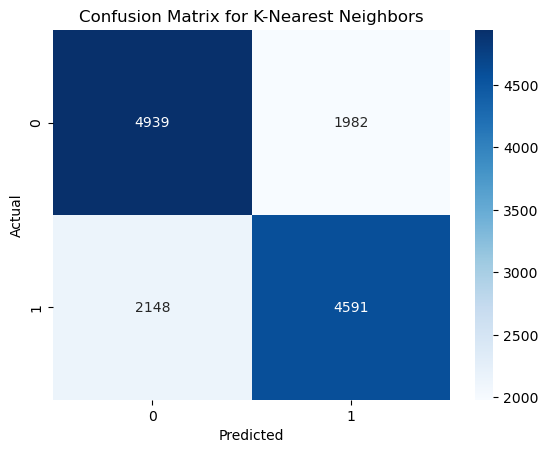


--- Training Decision Tree ---
Accuracy: 0.6338
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6921
           1       0.63      0.61      0.62      6739

    accuracy                           0.63     13660
   macro avg       0.63      0.63      0.63     13660
weighted avg       0.63      0.63      0.63     13660

Confusion Matrix:


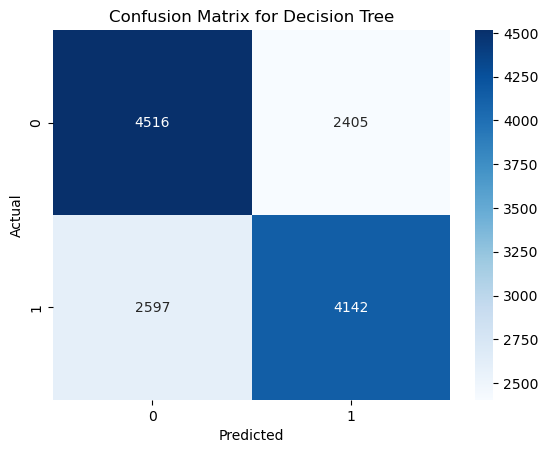


--- Training Support Vector Machine ---
Accuracy: 0.7375
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      6921
           1       0.77      0.67      0.72      6739

    accuracy                           0.74     13660
   macro avg       0.74      0.74      0.74     13660
weighted avg       0.74      0.74      0.74     13660

Confusion Matrix:


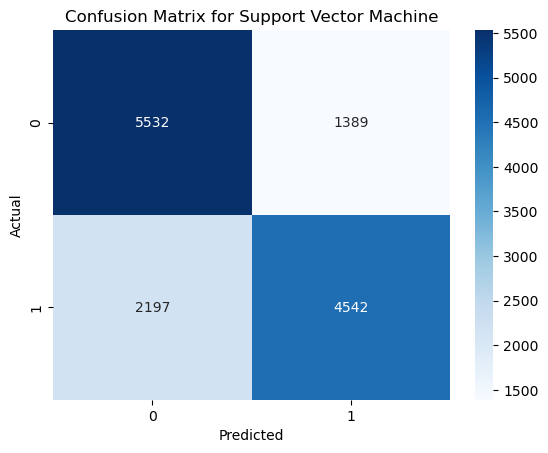


--- Training Random Forest ---
Accuracy: 0.7124
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6921
           1       0.71      0.70      0.71      6739

    accuracy                           0.71     13660
   macro avg       0.71      0.71      0.71     13660
weighted avg       0.71      0.71      0.71     13660

Confusion Matrix:


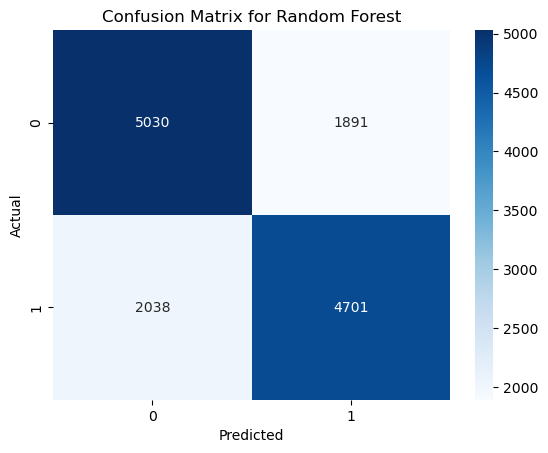

In [50]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    if name == 'Decision Tree' or name == 'Random Forest':

        # Decision Tree and Random Forest don't strictly require scaling, but it doesn't hurt.
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



In [51]:
# --- 5. Build Machine Learning Model for Heart Disease Detection ---
print("\n--- 5. Building Machine Learning Model for Heart Disease Detection ---")

# Select the best performing model based on accuracy
best_model_name = max(accuracy_results, key=accuracy_results.get)
best_model = models[best_model_name]
print(f"\nBest performing model is: {best_model_name} with an accuracy of {accuracy_results[best_model_name]:.4f}")


--- 5. Building Machine Learning Model for Heart Disease Detection ---

Best performing model is: Support Vector Machine with an accuracy of 0.7375


In [52]:
# Retrain the best model on the full dataset (optional, but good for deployment)
print(f"\nRetraining {best_model_name} on the full dataset for deployment...")
if best_model_name == 'Decision Tree' or best_model_name == 'Random Forest':
    best_model.fit(X, y)
else:
    # Re-scale the entire dataset for the best model if it's a scaling-sensitive model
    X_scaled_full = scaler.fit_transform(X)
    best_model.fit(X_scaled_full, y)
print(f"\n{best_model_name} model trained successfully on the full dataset.")
print("This model can now be used for new predictions.")


Retraining Support Vector Machine on the full dataset for deployment...



Support Vector Machine model trained successfully on the full dataset.
This model can now be used for new predictions.


In [53]:
# Example of making a prediction with the best model
# Let's create a sample new patient data (ensure it has the same features as X)
# Example: age_years=55, gender=1 (women), height=160, weight=70, ap_hi=120, ap_lo=80,
# cholesterol=1, gluc=1, smoke=0, alco=0, active=1, bmi (calculated)
sample_data = pd.DataFrame([[55, 1, 160, 70, 120, 80, 1, 1, 0, 0, 1, 70 / ((160/100)**2)]],
                           columns=X.columns)
print("\nSample data for prediction:")
print(sample_data)


Sample data for prediction:
   gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0      55       1     160     70    120           80     1      1     0   

   active  age_years       bmi  
0       0          1  27.34375  


In [54]:
from sklearn.svm import SVC

# If you're using GridSearchCV, make sure probability=True in the estimator
svc = SVC(probability=True, kernel='rbf', random_state=42)

# Example: inside GridSearchCV
# grid = GridSearchCV(SVC(probability=True), param_grid, cv=5)

svc.fit(X_train, y_train)
best_model = svc  # or from grid.best_estimator_

# Scale your sample
sample_data_scaled = scaler.transform(sample_data)

# Prediction + probability
prediction = best_model.predict(sample_data_scaled)
prediction_proba = best_model.predict_proba(sample_data_scaled)

print(f"\nPrediction: {'Cardiovascular Disease' if prediction[0] == 1 else 'No Cardiovascular Disease'}")
print(f"Prediction probabilities: {prediction_proba[0]}")



Prediction: Cardiovascular Disease
Prediction probabilities: [0.01237521 0.98762479]


c:\Users\sunco\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\sunco\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [55]:
if best_model_name == 'Decision Tree' or best_model_name == 'Random Forest':
    prediction = best_model.predict(sample_data)
    prediction_proba = best_model.predict_proba(sample_data)
else:
    sample_data_scaled = scaler.transform(sample_data)
    prediction = best_model.predict(sample_data_scaled)
    prediction_proba = best_model.predict_proba(sample_data_scaled)
print(f"\nPrediction for sample data: {'Cardiovascular Disease' if prediction[0] == 1 else 'No Cardiovascular Disease'}")
print(f"Prediction probabilities: {prediction_proba[0]}")


Prediction for sample data: Cardiovascular Disease
Prediction probabilities: [0.01237521 0.98762479]


c:\Users\sunco\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\sunco\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
